In [1]:
import pandas as pd
import data_util
from tqdm import tqdm_notebook as tqdm
from data_generator import DataGenerator
from state_util import StateUtil
from tec_an import TecAn
from data_agent import *
import numpy as np
from data_util import *
import tensorflow as tf
from sklearn_model_hyper import *
import pandas as pd
from stock_agent import *
from backtest import *
from joblib import dump, load
from datetime import datetime, timedelta
from tec_an import *
from bitstamp import *
from process_live_trade import *
from model_winner_select import *

base_dir = "data/"

In [113]:
currency = "btcusd"

full_data = base_dir + "backtest/"
full_data = base_dir + "4jul21/"
#full_data = base_dir + "btcusd/"
data_gen = DataGenerator(random = False, base_dir = full_data)
data_gen.rewind()
data_count = (data_gen.steps - 100)
#data_count = 200000
raw = data_gen.next()

minute = 5

hot_load = True

In [114]:
path = "model/"
files = os.listdir(path)
models = []
for file in files:
    models.append(f"{path}{file}")

models = ['model/rand']
#models = ['model/quadra']
    
timestamp = int(raw['timestamp'])

In [115]:
winner = get_best_model(
    minutes_list=[minute],
    result_paths=models,
    currency_list=[currency],
    timestamp = timestamp,
    winner_path = None
)

  0%|          | 0/119 [00:00<?, ?it/s]

model/rand - 200
Pre selected: 119
https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=300&limit=1000&start=1625288981


  0%|          | 0/501 [00:00<?, ?it/s]

  2%|▏         | 2/119 [00:19<19:26,  9.97s/it]

https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=300&limit=1000&start=1625288981


  0%|          | 0/501 [00:00<?, ?it/s]

 13%|█▎        | 15/119 [00:45<03:49,  2.21s/it]

https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=300&limit=1000&start=1625288981


  0%|          | 0/501 [00:00<?, ?it/s]

 19%|█▉        | 23/119 [01:20<05:09,  3.22s/it]

https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=300&limit=1000&start=1625288981


  0%|          | 0/501 [00:00<?, ?it/s]

 33%|███▎      | 39/119 [01:44<02:29,  1.87s/it]

https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=300&limit=1000&start=1625288981


  0%|          | 0/501 [00:00<?, ?it/s]

100%|██████████| 119/119 [04:46<00:00,  2.41s/it]

Selected: 31
RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=0.1,
                       random_state=42)
btcusd -> 103.90190764880748 | 64 - 26
{'recall': 0.23856081345326555, 'precision': 0.27892089620484684, 'f1': 0.2571669477234402, 'accuracy': 0.5922240222170794}

Pipeline(steps=[('normalizer', Normalizer()),
                ('pipeline',
                 Pipeline(steps=[('s',
                                  RFE(estimator=ExtraTreesClassifier(max_features=0.3,
                                                                     random_state=42),
                                      step=0.7500000000000001)),
                                 ('m',
                                  RandomForestClassifier(bootstrap=False,
                                                         criterion='entropy',
                                                         max_features=0.1,
                                                         random_state=42))]))])
btcus

In [116]:
result = winner
if (winner == None):
    result = results[-1]
model = result['model']
window = result['window']
minutes = result['minutes']
step = result['step']
profit = result['profit']
print(f"Minutes={minutes} Window={window} Step={step} | {profit}")
print(f"{model}")


Minutes=5 Window=30 Step=1 | 104.65924593659761
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('s',
                                  RFE(estimator=ExtraTreesClassifier(max_features=0.3,
                                                                     random_state=42),
                                      step=0.7500000000000001)),
                                 ('m',
                                  RandomForestClassifier(bootstrap=False,
                                                         criterion='entropy',
                                                         max_features=0.1,
                                                         random_state=42))]))])


In [6]:
import numpy as np
import matplotlib.pyplot as plt
def get_charts(stock_data):
    fig = plt.figure()
    ax = plt.axes()
    x = stock_data
    plt.plot(x, linewidth=1)
    #plt.grid(b=True, color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
    plt.show()


In [7]:
def get_online_data(minutes,
                    val_start,
                    val_end,
                    source_data_generator, 
                    load_from_disk, file_prefix = ""):
    
    online = OnLineDataProvider(
                 source_data_generator = source_data_generator,
                 minutes = minutes,
                 train_keys = [],
                 train_limit = 1000,
                 val_limit = 1000,
                 val_keys = [currency],
                 val_start = val_start,
                 val_end = val_end,
                 train_start_list = val_start
    )

    online_path = f'data/online{file_prefix}_{minutes}'
    
    online.load_val_cache([currency], val_start, val_end)
    
    return online

In [8]:

on_raw_data = lambda raw: print(raw)

data_gen.rewind()

first = data_gen.next()

In [9]:
agent_reference, back_reference, stock_reference = get_agent(minutes = minutes,
                                win = window,
                                step = step,
                                currency = currency,
                                hot_load = hot_load,
                                model = model,
                                timestamp = int(first['timestamp']),
                                simulate_on_price = True)
prices = []
agent_reference.on_closed_price = lambda price: prices.append(price)
#agent.ohlc['open'].plot()

BackTest (pending_sell_steps=2 sell_on_profit=True value=100)
https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=1800&limit=1000&start=1624538981


  0%|          | 0/501 [00:00<?, ?it/s]

###### Past report(501): 2021-06-24 12:30:00(1624537800) - 2021-07-04 22:30:00(1625437800) ######
Metric: {'recall': 0.2676056338028169, 'precision': 0.6440677966101694, 'f1': 0.37810945273631835, 'accuracy': 0.500998003992016}
16.98398% -> 116.98398083744523
Positive: 41 Negative: 9
###### - ######


In [10]:
data_gen.rewind()


reference_list = []
#data_count
for i in tqdm(range(data_count)):
    raw = data_gen.next()
    price = raw[PRICE_KEY]
    amount = raw[AMOUNT_KEY]
    timestamp = raw[TIMESTAMP_KEY]
    timestamp_pd = pd.to_datetime(timestamp, unit='s')
    reference_list.append([timestamp_pd, price])


100%|██████████| 301794/301794 [02:21<00:00, 2137.92it/s]


In [11]:
DATE = 'Date'
df = pd.DataFrame(agent_reference.list, columns = [DATE, CLOSE])
df = df.set_index(pd.DatetimeIndex(df[DATE]))

In [12]:
time = df[CLOSE].resample(agent_reference.resample)
ohlc = time.ohlc()
print("All data reference")
#ohlc.plot()
ohlc

All data reference


,open,high,low,close
Date,,,,
2021-06-24 12:30:00,34024.10,34024.10,34024.10,34024.10
2021-06-24 13:00:00,34092.88,34092.88,34092.88,34092.88
2021-06-24 13:30:00,33933.13,33933.13,33933.13,33933.13
2021-06-24 14:00:00,34071.71,34071.71,34071.71,34071.71
2021-06-24 14:30:00,34009.04,34009.04,34009.04,34009.04
...,...,...,...,...
2021-07-04 20:30:00,35531.38,35531.38,35531.38,35531.38
2021-07-04 21:00:00,35551.28,35551.28,35551.28,35551.28
2021-07-04 21:30:00,35589.59,35589.59,35589.59,35589.59


In [13]:
reference_list[0]

[Timestamp('2021-07-04 22:49:41'), 35330.0]

In [14]:
agent_raw, back_raw, stock_raw = get_agent(minutes = minutes,
                                win = window,
                                step = step,
                                currency = currency,
                                hot_load = hot_load,
                                model = model,
                                timestamp = int(first['timestamp']),
                                simulate_on_price = True)
prices = []

BackTest (pending_sell_steps=2 sell_on_profit=True value=100)
https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=1800&limit=1000&start=1624538981


  0%|          | 0/501 [00:00<?, ?it/s]

###### Past report(501): 2021-06-24 12:30:00(1624537800) - 2021-07-04 22:30:00(1625437800) ######
Metric: {'recall': 0.2676056338028169, 'precision': 0.6440677966101694, 'f1': 0.37810945273631835, 'accuracy': 0.500998003992016}
16.98398% -> 116.98398083744523
Positive: 41 Negative: 9
###### - ######


In [15]:
data_gen.rewind()
agent_raw.save_history = True
#data_count
for i in range(data_count):
    raw = data_gen.next()
    agent_raw.on_new_raw_data(raw)

2021-08-16 20:45:18.202730 ModelAgent(35340.23): 2021-07-04 23:00:04(1625439604) DOWN
2021-08-16 20:45:20.338323 ModelAgent(35415.34): 2021-07-04 23:30:08(1625441408) DOWN
2021-08-16 20:45:22.184521 ModelAgent(35247.7): 2021-07-05 00:00:17(1625443217) DOWN
2021-08-16 20:45:24.548365 ModelAgent(34922.82): 2021-07-05 00:30:08(1625445008) UP
2021-08-16 20:45:24.548535 BackTest: Bought: 34922.82
2021-08-16 20:45:26.527390 ModelAgent(34898.82): 2021-07-05 01:00:40(1625446840) UP
2021-08-16 20:45:28.492239 ModelAgent(34639.91): 2021-07-05 01:30:15(1625448615) UP
2021-08-16 20:45:32.705854 ModelAgent(34560.8): 2021-07-05 02:00:08(1625450408) UP
2021-08-16 20:45:38.025854 ModelAgent(34477.16): 2021-07-05 02:30:40(1625452240) UP
2021-08-16 20:45:42.659797 ModelAgent(34430.21): 2021-07-05 03:00:02(1625454002) UP
2021-08-16 20:45:45.258995 ModelAgent(34426.56): 2021-07-05 03:30:06(1625455806) UP
2021-08-16 20:45:48.312196 ModelAgent(34363.72): 2021-07-05 04:00:01(1625457601) UP
2021-08-16 20:45:5

In [16]:
val_start = int(first['timestamp'])
val_end = int(raw['timestamp'])

start_string = pd.to_datetime(val_start, unit='s')
end_string = pd.to_datetime(val_end, unit='s')

print(f"{start_string}({val_start}) -> {end_string}({val_end})")

2021-07-04 22:49:41(1625438981) -> 2021-07-05 08:50:02(1625475002)


In [17]:
back_raw.on_down(back_raw.buy_price, back_raw.buy_price)
back_raw.report()

2021-08-16 20:46:31.070933 BackTest: SOLD >>>> Result: LOSS 0.0 total: 98.21535030676218
-1.78465% -> 98.21535030676218
Positive: 0 Negative: 2


<AxesSubplot:xlabel='Date'>

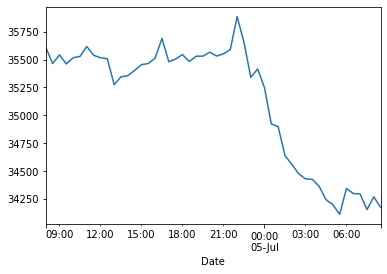

In [18]:
agent_raw.ohlc[-50:]["open"].plot()
#agent.ohlc[1:]

In [19]:
tec = TecAn(windows = window, windows_limit = 100)
source_data_generator = SourceDataGenerator(tec = tec)

In [99]:
online = get_online_data(minutes = 5, 
                 source_data_generator = source_data_generator, 
                 load_from_disk = True, 
                 file_prefix = "____",
                 val_start = val_start,
                 val_end = val_end)


https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=300&limit=1000&start=1625438981


  0%|          | 0/123 [00:00<?, ?it/s]

In [100]:
online.load_val_cache([currency],1629215891,  1629229205)

https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=300&limit=1000&start=1629215891


  0%|          | 0/47 [00:00<?, ?it/s]

In [101]:
x_list, price_list, time_list = online.load_val_data(currency)

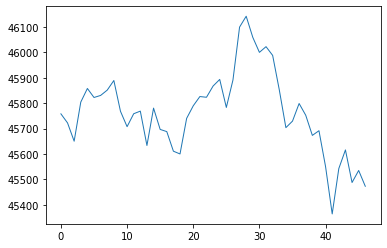

47


In [102]:
get_charts(price_list)
print(len(price_list))

In [103]:
agent_array, back_array, stock_array = get_agent(minutes = minutes,
                                win = window,
                                step = step,
                                currency = currency,
                                hot_load = hot_load,
                                model = model,
                                timestamp = int(first['timestamp']),
                                simulate_on_price = True)

BackTest (pending_sell_steps=2 sell_on_profit=True value=100)
https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=1800&limit=1000&start=1624538981


  0%|          | 0/501 [00:00<?, ?it/s]

###### Past report(501): 2021-06-24 12:30:00(1624537800) - 2021-07-04 22:30:00(1625437800) ######
Metric: {'recall': 0.2676056338028169, 'precision': 0.6440677966101694, 'f1': 0.37810945273631835, 'accuracy': 0.500998003992016}
16.98398% -> 116.98398083744523
Positive: 41 Negative: 9
###### - ######


In [104]:
agent_array.save_history = True
for idx in range(len(price_list)):
    price = price_list[idx]
    time = time_list[idx]
    order = [[f"{price}", f"{price}"]]
    amount = 0.0
    agent_array.process_data(price, amount, time, order, order)

2021-08-17 21:00:02.762693 ModelAgent(45757.87): 2021-08-17 15:55:00(1629215700) UP
2021-08-17 21:00:02.762882 BackTest: Bought: 45757.87
2021-08-17 21:00:02.794053 ModelAgent(45722.19): 2021-08-17 16:00:00(1629216000) UP
2021-08-17 21:00:02.846561 ModelAgent(45851.3): 2021-08-17 16:30:00(1629217800) UP
2021-08-17 21:00:02.846712 BackTest: Profit detected bid: 45851.3 ask: 45851.3
2021-08-17 21:00:02.846762 BackTest: SOLD >>>> Result: PROFIT 0.2042 total: 100.20418345521765
2021-08-17 21:00:02.895374 ModelAgent(45633.35): 2021-08-17 17:00:00(1629219600) UP
2021-08-17 21:00:02.895556 BackTest: Bought: 45633.35
2021-08-17 21:00:02.952226 ModelAgent(45740.02): 2021-08-17 17:30:00(1629221400) UP
2021-08-17 21:00:02.952775 BackTest: Profit detected bid: 45740.02 ask: 45740.02
2021-08-17 21:00:02.952848 BackTest: SOLD >>>> Result: PROFIT 0.2338 total: 100.43793793521965
2021-08-17 21:00:03.010297 ModelAgent(45783.08): 2021-08-17 18:00:00(1629223200) UP
2021-08-17 21:00:03.010942 BackTest: Bo

In [108]:
back_array.on_down(back_array.buy_price, back_array.buy_price)
back_array.report()

0.96066% -> 100.96066379813668
Positive: 3 Negative: 1


In [81]:
def eval_step_(model, train_set, step, provider, verbose = False):

    valX, valY, times = provider.load_val_data(train_set)
    
    x, y, closed_prices = get_sequencial_data(valX, valY, step)
    
    history = []
    
    preds = model.predict(np.array(x))
    
    #for idx in range(len(x)):
    #    print(f"{times[idx]} -> {closed_prices[idx]} {y[idx]} ")

    metrics = {}
    metrics["recall"] = recall_score(y, preds)
    metrics["precision"] = precision_score(y, preds)
    metrics["f1"] = f1_score(y, preds)
    metrics["accuracy"] = accuracy_score(y, preds)
    metrics["roc_auc"] = roc_auc_score(y, preds)
    
    back = BackTest(value = 100, 
                    verbose = True, 
                    sell_on_profit = True,
                    pending_sell_steps = step)
    
    back = backtest_model(model, valX, valY, back)
    
    for idx in range(len(times)):
        timestamp = times[idx]
        price = closed_prices[idx]
        y = model.predict([valX[idx]])
        is_up = False
        if (y[0] > 0.5):
            is_up = True
        history.append((timestamp, price, x, is_up))
    
    get_charts(valY)

    
    return back, metrics, history
    

BackTest (pending_sell_steps=2 sell_on_profit=True value=100)
2021-08-16 21:22:12.665497 BackTest: Bought: 40811.15
2021-08-16 21:22:12.668056 BackTest: Profit detected bid: 40993.6 ask: 40993.6
2021-08-16 21:22:12.668313 BackTest: SOLD >>>> Result: PROFIT 0.4471 total: 100.44705919828282
2021-08-16 21:22:12.668856 BackTest: Bought: 40785.31
2021-08-16 21:22:12.669312 BackTest: Profit detected bid: 40995.47 ask: 40995.47
2021-08-16 21:22:12.669367 BackTest: SOLD >>>> Result: PROFIT 0.5153 total: 100.96234276484147
2021-08-16 21:22:12.669795 BackTest: Bought: 40961.5
2021-08-16 21:22:12.671627 BackTest: Profit detected bid: 41710.42 ask: 41710.42
2021-08-16 21:22:12.671951 BackTest: SOLD >>>> Result: PROFIT 1.8284 total: 102.79069377737763
2021-08-16 21:22:12.672516 BackTest: Bought: 42240.0
2021-08-16 21:22:12.672975 BackTest: Profit detected bid: 42609.9 ask: 42609.9
2021-08-16 21:22:12.673032 BackTest: SOLD >>>> Result: PROFIT 0.8757 total: 103.66640400465036
2021-08-16 21:22:12.6739

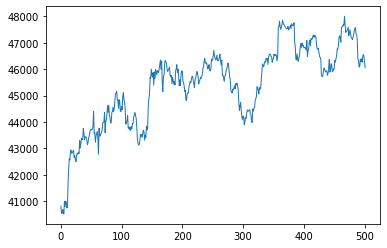

2021-08-16 21:22:13.218313 BackTest: SOLD >>>> Result: LOSS 0.0 total: 106.8926035045033
6.8926% -> 106.8926035045033
Positive: 35 Negative: 15


In [85]:
back_eval, metr, history = eval_step_(model, currency, step, online, verbose = False)
back_eval.on_down(back_eval.buy_price, back_eval.buy_price)
back_eval.report()

In [83]:
for data in history:
    print(f"{data[0]} - {data[1]} - {data[3]}")

1628242200 - 40811.15 - True
1628244000 - 40615.25 - True
1628245800 - 40527.57 - True
1628247600 - 40676.24 - True
1628249400 - 40643.18 - True
1628251200 - 40513.18 - True
1628253000 - 40993.6 - True
1628254800 - 40785.31 - True
1628256600 - 40995.47 - True
1628258400 - 40961.5 - True
1628260200 - 40736.29 - True
1628262000 - 40783.02 - True
1628263800 - 41710.42 - True
1628265600 - 42240.0 - True
1628267400 - 42609.9 - True
1628269200 - 42559.51 - True
1628271000 - 42929.29 - True
1628272800 - 42932.86 - True
1628274600 - 42802.26 - True
1628276400 - 42843.67 - True
1628278200 - 42883.94 - True
1628280000 - 42935.59 - True
1628281800 - 42652.39 - True
1628283600 - 42724.49 - True
1628285400 - 42567.9 - True
1628287200 - 42494.21 - True
1628289000 - 42712.25 - True
1628290800 - 42812.4 - True
1628292600 - 42781.31 - True
1628294400 - 42857.09 - True
1628296200 - 42803.87 - True
1628298000 - 43289.68 - True
1628299800 - 43009.59 - True
1628301600 - 43200.17 - False
1628303400 - 43383.

In [80]:
print(metrics)


{'recall': 0.2793103448275862, 'precision': 0.6230769230769231, 'f1': 0.3857142857142857, 'accuracy': 0.4860557768924303}


In [65]:
back_raw.report()
#-1.78465% -> 98.21535030676218

-1.78465% -> 98.21535030676218
Positive: 0 Negative: 2


In [66]:
back_array.report()
#-1.89717% -> 98.10282664807247

9.49914% -> 109.49914344524747
Positive: 43 Negative: 17


6.8926% -> 106.8926035045033
Positive: 35 Negative: 15


In [68]:
agent_raw.report()

1625439604 - 35340.23 - False
1625441408 - 35415.34 - False
1625443217 - 35247.7 - False
1625445008 - 34922.82 - True
1625446840 - 34898.82 - True
1625448615 - 34639.91 - True
1625450408 - 34560.8 - True
1625452240 - 34477.16 - True
1625454002 - 34430.21 - True
1625455806 - 34426.56 - True
1625457601 - 34363.72 - True
1625459423 - 34245.31 - True
1625461201 - 34199.5 - True
1625463001 - 34112.89 - True
1625464817 - 34344.29 - True
1625466630 - 34299.57 - False
1625468403 - 34295.01 - True
1625470202 - 34154.96 - True
1625472001 - 34269.56 - True
1625473811 - 34174.91 - True


In [69]:
agent_array.report()

1628242200 - 40811.15 - True
1628244000 - 40615.25 - True
1628245800 - 40527.57 - True
1628247600 - 40676.24 - True
1628249400 - 40643.18 - True
1628251200 - 40513.18 - True
1628253000 - 40993.6 - True
1628254800 - 40785.31 - True
1628256600 - 40995.47 - True
1628258400 - 40961.5 - True
1628260200 - 40736.29 - True
1628262000 - 40783.02 - True
1628263800 - 41710.42 - True
1628265600 - 42240.0 - True
1628267400 - 42609.9 - True
1628269200 - 42559.51 - True
1628271000 - 42929.29 - True
1628272800 - 42932.86 - True
1628274600 - 42802.26 - True
1628276400 - 42843.67 - True
1628278200 - 42883.94 - True
1628280000 - 42935.59 - True
1628281800 - 42652.39 - True
1628283600 - 42724.49 - True
1628285400 - 42567.9 - True
1628287200 - 42494.21 - True
1628289000 - 42712.25 - True
1628290800 - 42812.4 - True
1628292600 - 42781.31 - True
1628294400 - 42857.09 - True
1628296200 - 42803.87 - True
1628298000 - 43289.68 - True
1628299800 - 43009.59 - True
1628301600 - 43200.17 - True
1628303400 - 43383.9